In [64]:
#bu çalışma lineer regresyon ödevi olarak serbest çalışma şeklinde yapılmıştır.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("taxi_trip_pricing.csv")

In [66]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [67]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [69]:
df.shape

(1000, 11)

In [70]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [71]:
df = df.dropna(subset=["Trip_Price"])

In [72]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              49
Day_of_Week              46
Passenger_Count          48
Traffic_Conditions       50
Weather                  46
Base_Fare                44
Per_Km_Rate              44
Per_Minute_Rate          49
Trip_Duration_Minutes    46
Trip_Price                0
dtype: int64

In [73]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [74]:
"""df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].median(), inplace = True)
df["Passenger_Count"].fillna(df["Passenger_Count"].median(), inplace = True)
df["Base_Fare"].fillna(df["Base_Fare"].median(), inplace = True)
df["Per_Km_Rate"].fillna(df["Per_Km_Rate"].median(), inplace = True)
df["Per_Minute_Rate"].fillna(df["Per_Minute_Rate"].median(), inplace = True)
df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median(), inplace = True)
"""


'df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].median(), inplace = True)\ndf["Passenger_Count"].fillna(df["Passenger_Count"].median(), inplace = True)\ndf["Base_Fare"].fillna(df["Base_Fare"].median(), inplace = True)\ndf["Per_Km_Rate"].fillna(df["Per_Km_Rate"].median(), inplace = True)\ndf["Per_Minute_Rate"].fillna(df["Per_Minute_Rate"].median(), inplace = True)\ndf["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median(), inplace = True)\n'

In [75]:
df["Trip_Duration_Minutes"].unique()

array([ 53.82,  37.27, 116.81,  22.64,  89.33,   5.05,    nan,  26.34,
        86.95,  84.12,  41.72,  34.  , 114.93, 111.18,  57.59,  57.02,
        53.8 ,  23.03,  54.04,  66.8 ,   7.59,  56.07,  94.86,  83.21,
        78.04, 109.6 ,   7.07,  95.55,  67.25,  42.25,  20.67, 107.07,
        59.14, 105.98,  72.37,  82.53,  97.49,  80.8 ,  50.78,  64.07,
        97.35,  47.97,  49.63,  16.  , 110.18,  15.47,  79.54,  52.52,
        51.65,  83.15,  12.72,  73.28,  93.78, 100.24,  24.61, 108.2 ,
       106.41,  60.81,  67.33, 110.69, 108.49,  56.54,  36.56,  50.21,
        49.59,  37.99,  35.89, 104.02,  13.03,  82.93,  24.87,  44.62,
        12.08,  36.05,  93.37, 106.78,  30.48,  58.31,  59.09, 105.46,
        92.72,  64.  ,  82.14, 102.45,   6.1 ,  51.33, 109.33,  67.43,
        65.91,  44.99,  80.37,  53.11,  87.13, 104.04,  22.79,  56.93,
        51.92,  84.06,  33.73,  78.63,  53.09, 109.77, 119.21,  17.2 ,
        31.8 , 114.29, 115.21,  16.24,   6.72,  23.53, 119.54,  25.7 ,
      

In [76]:
df["Trip_Duration_Minutes"] = pd.to_numeric(df["Trip_Duration_Minutes"], errors='coerce')

In [77]:
df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].median(), inplace = True)
df["Passenger_Count"].fillna(df["Passenger_Count"].median(), inplace = True)
df["Base_Fare"].fillna(df["Base_Fare"].median(), inplace = True)
df["Per_Km_Rate"].fillna(df["Per_Km_Rate"].median(), inplace = True)
df["Per_Minute_Rate"].fillna(df["Per_Minute_Rate"].median(), inplace = True)
df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median(), inplace = True)

In [78]:
df.isnull().sum()

Trip_Distance_km          0
Time_of_Day              49
Day_of_Week              46
Passenger_Count           0
Traffic_Conditions       50
Weather                  46
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

In [79]:
df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0], inplace = True)
df["Day_of_Week"].fillna(df["Day_of_Week"].mode()[0], inplace = True)
df["Traffic_Conditions"].fillna(df["Traffic_Conditions"].mode()[0], inplace = True)
df["Weather"].fillna(df["Weather"].mode()[0], inplace = True)

In [80]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            951 non-null    object 
 2   Day_of_Week            951 non-null    object 
 3   Passenger_Count        951 non-null    float64
 4   Traffic_Conditions     951 non-null    object 
 5   Weather                951 non-null    object 
 6   Base_Fare              951 non-null    float64
 7   Per_Km_Rate            951 non-null    float64
 8   Per_Minute_Rate        951 non-null    float64
 9   Trip_Duration_Minutes  951 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [82]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,25.87,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [83]:
df["Time_of_Day"].unique()

array(['Morning', 'Evening', 'Afternoon', 'Night'], dtype=object)

In [84]:
df["Day_of_Week"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [85]:
df["Traffic_Conditions"].unique()


array(['Low', 'High', 'Medium'], dtype=object)

In [86]:
df["Weather"].unique()

array(['Clear', 'Rain', 'Snow'], dtype=object)

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Day_of_Week"] = label_encoder.fit_transform(df["Day_of_Week"])

In [88]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,0,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,1,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,0,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,25.87,Evening,0,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,1,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


In [89]:
df = pd.get_dummies(df, columns= ["Time_of_Day", "Traffic_Conditions", "Weather"], drop_first=True)

In [90]:
df.head()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,0,3.0,3.56,0.80,0.32,53.82,36.2624,False,True,False,True,False,False,False
2,36.87,1,1.0,2.70,1.21,0.15,37.27,52.9032,True,False,False,False,False,False,False
3,30.33,0,4.0,3.48,0.51,0.15,116.81,36.4698,True,False,False,True,False,False,False
4,25.87,0,3.0,2.93,0.63,0.32,22.64,15.6180,True,False,False,False,False,False,False
5,8.64,1,2.0,2.55,1.71,0.48,89.33,60.2028,False,False,False,False,True,False,False


In [91]:
df = df.astype(int)

In [92]:
df


,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19,0,3,3,0,0,53,36,0,1,0,1,0,0,0
2,36,1,1,2,1,0,37,52,1,0,0,0,0,0,0
3,30,0,4,3,0,0,116,36,1,0,0,1,0,0,0
4,25,0,3,2,0,0,22,15,1,0,0,0,0,0,0
5,8,1,2,2,1,0,89,60,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,1,4,2,0,0,58,34,0,0,0,0,1,0,0
996,45,0,4,3,0,0,61,62,0,0,1,0,1,0,0
997,7,0,3,2,1,0,54,33,0,1,0,1,0,1,0
998,47,0,1,2,0,0,114,61,0,1,0,1,0,0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Trip_Distance_km           951 non-null    int32
 1   Day_of_Week                951 non-null    int32
 2   Passenger_Count            951 non-null    int32
 3   Base_Fare                  951 non-null    int32
 4   Per_Km_Rate                951 non-null    int32
 5   Per_Minute_Rate            951 non-null    int32
 6   Trip_Duration_Minutes      951 non-null    int32
 7   Trip_Price                 951 non-null    int32
 8   Time_of_Day_Evening        951 non-null    int32
 9   Time_of_Day_Morning        951 non-null    int32
 10  Time_of_Day_Night          951 non-null    int32
 11  Traffic_Conditions_Low     951 non-null    int32
 12  Traffic_Conditions_Medium  951 non-null    int32
 13  Weather_Rain               951 non-null    int32
 14  Weather_Snow               951 

In [94]:
df.describe()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.0,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,26.597266,0.297581,2.455310,2.992639,0.670873,0.0,61.541535,56.370137,0.207150,0.278654,0.093586,0.445846,0.373291,0.227129,0.057834
std,19.624495,0.457435,1.077937,0.794023,0.474600,0.0,31.527701,40.459463,0.405477,0.448573,0.291405,0.497320,0.483933,0.419197,0.233552
min,1.000000,0.000000,1.000000,2.000000,0.000000,0.0,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,2.000000,2.000000,0.000000,0.0,36.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,2.000000,3.000000,1.000000,0.0,61.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,1.000000,3.000000,4.000000,1.000000,0.0,87.000000,69.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,146.000000,1.000000,4.000000,5.000000,2.000000,0.0,119.000000,332.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
df.corr()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
Trip_Distance_km,1.000000,-0.020289,-0.042128,0.028587,-0.018654,NaN,-0.023903,0.841829,-0.003395,-0.044635,-0.007576,-0.046188,-0.040016,0.058730,-0.039468
Day_of_Week,-0.020289,1.000000,0.017393,-0.034537,-0.033247,NaN,-0.000748,-0.030357,-0.020564,-0.060837,0.043553,-0.005435,0.025481,0.042392,-0.003616
Passenger_Count,-0.042128,0.017393,1.000000,0.028517,0.044263,NaN,0.019343,-0.013281,0.017590,0.020339,0.031760,-0.004028,-0.001282,0.024816,-0.012719
Base_Fare,0.028587,-0.034537,0.028517,1.000000,-0.000849,NaN,0.024211,0.038683,-0.008337,-0.017878,0.025727,-0.010340,0.018116,-0.045571,-0.031759
Per_Km_Rate,-0.018654,-0.033247,0.044263,-0.000849,1.000000,NaN,0.037109,0.204685,0.031934,-0.008807,0.032670,0.038131,-0.009899,0.011066,0.048451
Per_Minute_Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trip_Duration_Minutes,-0.023903,-0.000748,0.019343,0.024211,0.037109,NaN,1.000000,0.219261,-0.031016,0.067620,-0.026833,0.010231,-0.006571,0.017047,0.022761
Trip_Price,0.841829,-0.030357,-0.013281,0.038683,0.204685,NaN,0.219261,1.000000,-0.005834,-0.013925,-0.004548,-0.030496,-0.044590,0.038917,0.005753
Time_of_Day_Evening,-0.003395,-0.020564,0.017590,-0.008337,0.031934,NaN,-0.031016,-0.005834,1.000000,-0.317693,-0.164244,-0.051322,0.002476,-0.010803,0.062321
Time_of_Day_Morning,-0.044635,-0.060837,0.020339,-0.017878,-0.008807,NaN,0.067620,-0.013925,-0.317693,1.000000,-0.199711,0.041762,0.000377,-0.029049,-0.003275


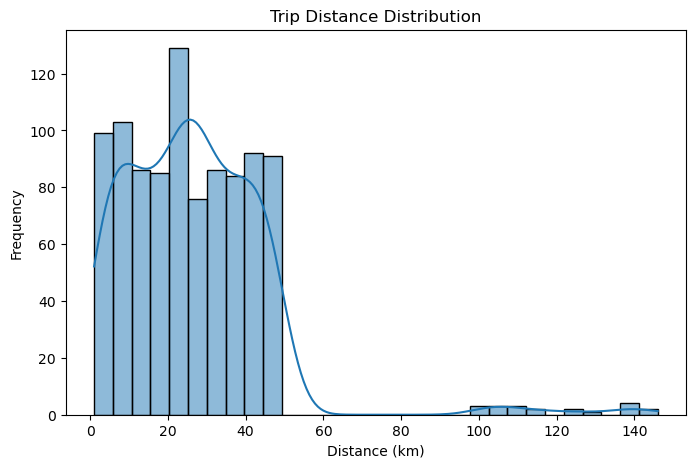

In [96]:
plt.figure(figsize=(8,5))
sns.histplot(df["Trip_Distance_km"], bins=30, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

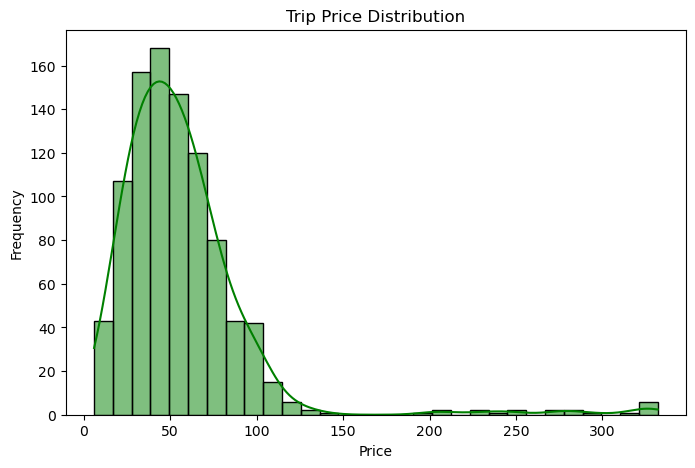

In [97]:
plt.figure(figsize=(8,5))
sns.histplot(df["Trip_Price"], bins=30, kde=True, color="green")
plt.title("Trip Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

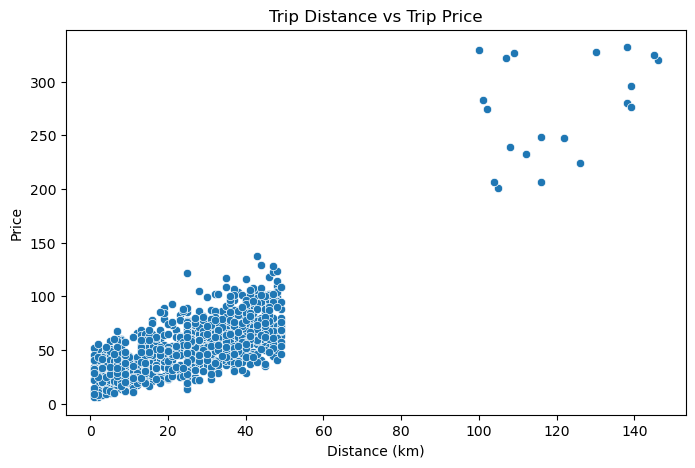

In [98]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Trip_Distance_km", y="Trip_Price")
plt.title("Trip Distance vs Trip Price")
plt.xlabel("Distance (km)")
plt.ylabel("Price")
plt.show()

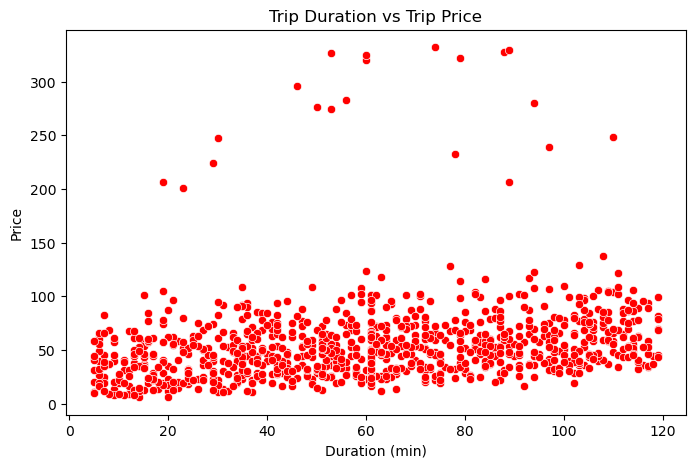

In [99]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Trip_Duration_Minutes", y="Trip_Price", color="red")
plt.title("Trip Duration vs Trip Price")
plt.xlabel("Duration (min)")
plt.ylabel("Price")
plt.show()

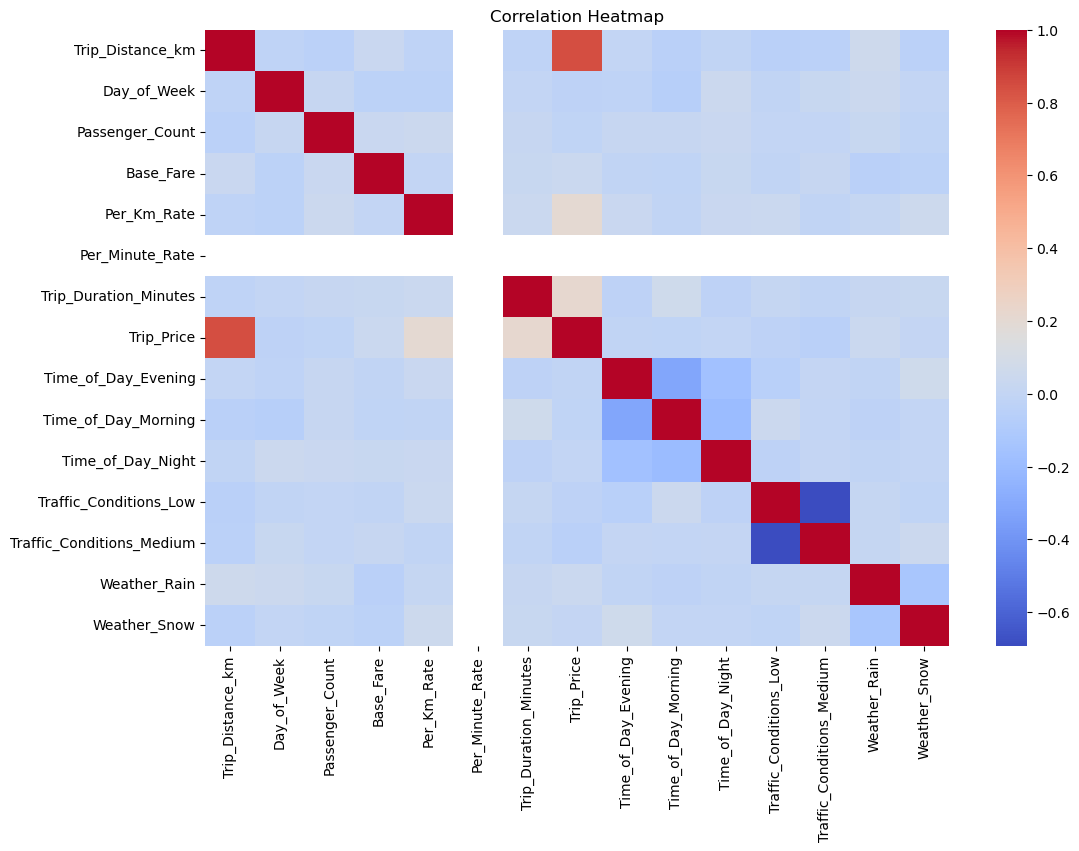

In [100]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [101]:
X = df.drop("Trip_Price", axis=1)
y = df["Trip_Price"]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [106]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
y_pred = reg.predict(X_test_scaled)

In [108]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Skoru:", r2)
print("MAE:", mae)
print("RMSE:", rmse)



R² Skoru: 0.828180459273798
MAE: 13.285961702060593
RMSE: 20.032711736867558


In [110]:
coef_df = pd.DataFrame(reg.coef_, X.columns, columns=["Coefficient"])



In [111]:
coef_df

,Coefficient
Trip_Distance_km,31.867726
Day_of_Week,-0.047520
Passenger_Count,-0.073547
Base_Fare,0.247489
Per_Km_Rate,8.163683
Per_Minute_Rate,0.000000
Trip_Duration_Minutes,9.669860
Time_of_Day_Evening,0.350970
Time_of_Day_Morning,0.660128
Time_of_Day_Night,-0.157034
